In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, Flatten, Input, Dropout, LSTM
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
model = Sequential([
        Dense(22, activation='relu'),  
        Dense(64, activation='relu'),
        Dense(128, activation='relu'),
        Dense(256, activation='relu'),
        Dense(512, activation='relu'),
        Dense(1024)
    ])

In [24]:
x_inputs_proc = np.load('train_data_wavenumber_cutoffs_density_hardness/x_inputs_proc.npy')  
y_labels_proc = np.load('train_data_wavenumber_cutoffs_density_hardness/y_labels_proc.npy')  

In [78]:
x_inputs_proc.shape

(4005, 22)

In [79]:
names = np.load('train_data_wavenumber_cutoffs_density_hardness/names_proc.npy')

In [80]:
names.shape

(4005,)

In [84]:
x_train, x_temp, y_train, y_temp, names_train, names_temp = train_test_split(
    x_inputs_proc, y_labels_proc, names, test_size=0.4, random_state=42
)

x_val, x_test, y_val, y_test, names_val, names_test = train_test_split(
   x_temp, y_temp, names_temp, test_size=0.5, random_state=42
)

(801,)


In [26]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [27]:
model_eval = model.fit(x_train, y_train, 
                        validation_data=(x_val, y_val), 
                        epochs=150, batch_size=32)

Epoch 1/150
76/76 [==============================] - 1s 9ms/step - loss: 0.0134 - val_loss: 0.0125
Epoch 2/150
76/76 [==============================] - 1s 7ms/step - loss: 0.0124 - val_loss: 0.0117
Epoch 3/150
76/76 [==============================] - 1s 8ms/step - loss: 0.0117 - val_loss: 0.0107
Epoch 4/150
76/76 [==============================] - 1s 9ms/step - loss: 0.0109 - val_loss: 0.0102
Epoch 5/150
76/76 [==============================] - 1s 8ms/step - loss: 0.0104 - val_loss: 0.0102
Epoch 6/150
76/76 [==============================] - 1s 8ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 7/150
76/76 [==============================] - 1s 9ms/step - loss: 0.0098 - val_loss: 0.0095
Epoch 8/150
76/76 [==============================] - 1s 7ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 9/150
76/76 [==============================] - 1s 7ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 10/150
76/76 [==============================] - 1s 7ms/step - loss: 0.0090 - val_loss: 0.0088
Epoch 11/

76/76 [==============================] - 1s 9ms/step - loss: 0.0038 - val_loss: 0.0055
Epoch 84/150
76/76 [==============================] - 1s 7ms/step - loss: 0.0038 - val_loss: 0.0056
Epoch 85/150
76/76 [==============================] - 1s 7ms/step - loss: 0.0038 - val_loss: 0.0056
Epoch 86/150
76/76 [==============================] - 1s 8ms/step - loss: 0.0038 - val_loss: 0.0055
Epoch 87/150
76/76 [==============================] - 1s 9ms/step - loss: 0.0037 - val_loss: 0.0056
Epoch 88/150
76/76 [==============================] - 1s 8ms/step - loss: 0.0037 - val_loss: 0.0055
Epoch 89/150
76/76 [==============================] - 1s 8ms/step - loss: 0.0037 - val_loss: 0.0057
Epoch 90/150
76/76 [==============================] - 1s 7ms/step - loss: 0.0037 - val_loss: 0.0058
Epoch 91/150
76/76 [==============================] - 1s 7ms/step - loss: 0.0039 - val_loss: 0.0055
Epoch 92/150
76/76 [==============================] - 1s 7ms/step - loss: 0.0037 - val_loss: 0.0057
Epoch 93/150


In [14]:
y_pred = model.predict(x_test)

26/26 [==============================] - 0s 2ms/step


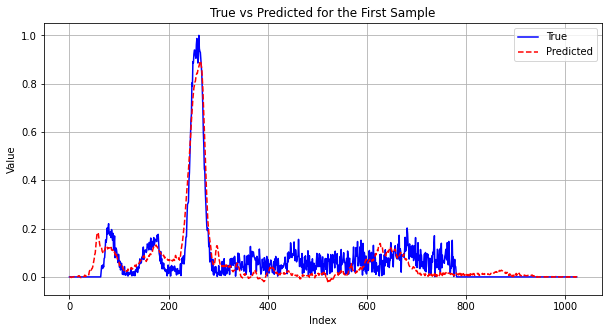

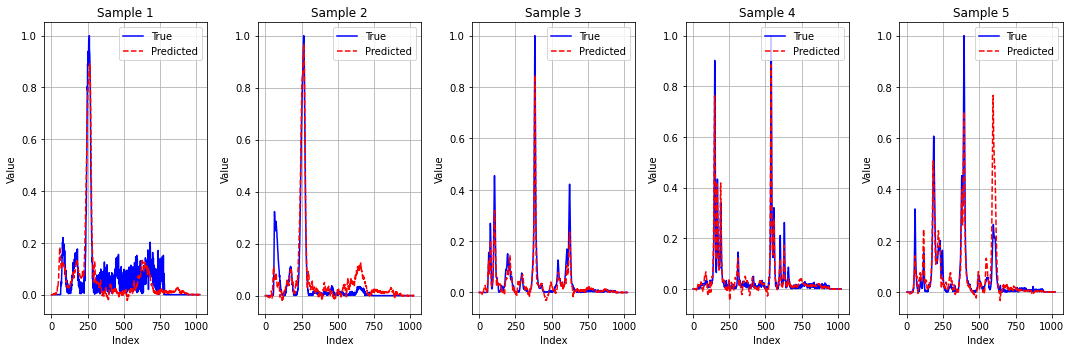

In [15]:
# Plot true vs predicted values for the first sample
plt.figure(figsize=(10, 5))

# Plot the true values for the first sample
plt.plot(y_test[0], label='True', linestyle='-', color='blue')

# Plot the predicted values for the first sample
plt.plot(y_pred[0], label='Predicted', linestyle='--', color='red')

# Add labels and title
plt.title('True vs Predicted for the First Sample')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Optionally, plot true vs predicted for multiple samples (e.g., first 5 samples)
plt.figure(figsize=(15, 5))

for i in range(5):  # Plot first 5 samples
    plt.subplot(1, 5, i+1)  # Create a subplot for each sample
    plt.plot(y_test[i], label='True', linestyle='-', color='blue')
    plt.plot(y_pred[i], label='Predicted', linestyle='--', color='red')
    plt.title(f'Sample {i+1}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [35]:
import shap

explainer = shap.KernelExplainer(model.predict, x_train_sample)
shap_values = explainer.shap_values(x_test)

4/4 [==============================] - 0s 2ms/step


  0%|          | 0/801 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


6538/6538 [==============================] - 9s 1ms/step


1/1 [==============================] - 0s 13ms/step


6538/6538 [==============================] - 10s 2ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 14ms/step


6538/6538 [==============================] - 10s 2ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 18ms/step


6538/6538 [==============================] - 14s 2ms/step


In [38]:
np.save("shap_vals.npy", np.array(shap_values))

In [39]:
shap_vals_np = np.array(shap_values)

In [43]:
shap_vals_np.shape

(1024, 801, 22)

In [46]:
np.load('extracted_names_density_hardness.npy').shape

(1104,)

In [87]:
feature_names = np.zeros(22, dtype='<U5')

In [88]:
feature_names[0:20] = np.load('extracted_chemistry_oxide_names.npy')

In [89]:
feature_names

array(['Al2O3', 'As2O5', 'BaO', 'CO2', 'CaO', 'Cr2O3', 'CuO', 'Fe2O3',
       'FeO', 'K2O', 'MgO', 'MnO', 'Na2O', 'P2O5', 'PbO', 'SO3', 'SiO2',
       'SrO', 'TiO2', 'ZnO', '', ''], dtype='<U5')

In [90]:
feature_names[20] = 'Density' 
feature_names[21] = 'Hardness'

In [91]:
feature_names

array(['Al2O3', 'As2O5', 'BaO', 'CO2', 'CaO', 'Cr2O3', 'CuO', 'Fe2O3',
       'FeO', 'K2O', 'MgO', 'MnO', 'Na2O', 'P2O5', 'PbO', 'SO3', 'SiO2',
       'SrO', 'TiO2', 'ZnO', 'Densi', 'Hardn'], dtype='<U5')

In [92]:
shap_values[0].shape

(801, 22)

In [93]:
x_test[0]

array([1.89680e-01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 7.36550e-02,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 1.25000e-04, 7.29000e-03,
       8.42000e-03, 0.00000e+00, 1.20500e-03, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 4.99655e-01, 1.14750e-02, 0.00000e+00, 0.00000e+00,
       2.10000e+00, 4.00000e+00])

In [102]:
np.where(names_test == 'Quartz')

(array([ 52, 637]),)

Quartz


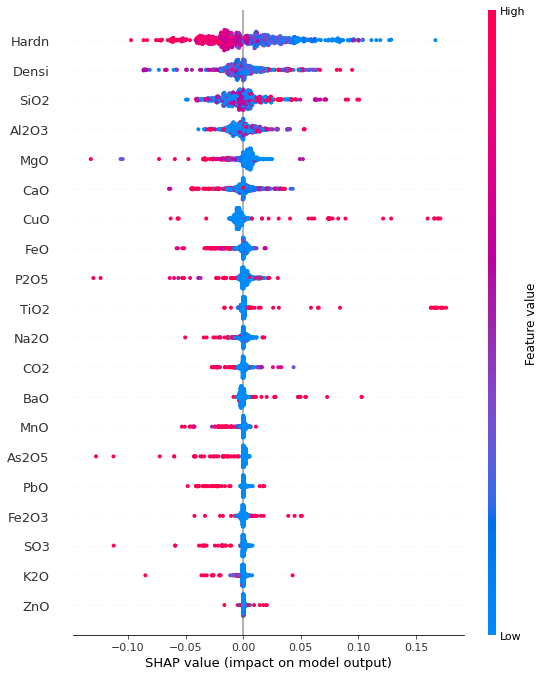

In [103]:
print(names_test[52])
shap.summary_plot(shap_values[52], x_test, feature_names=feature_names)

Quartz


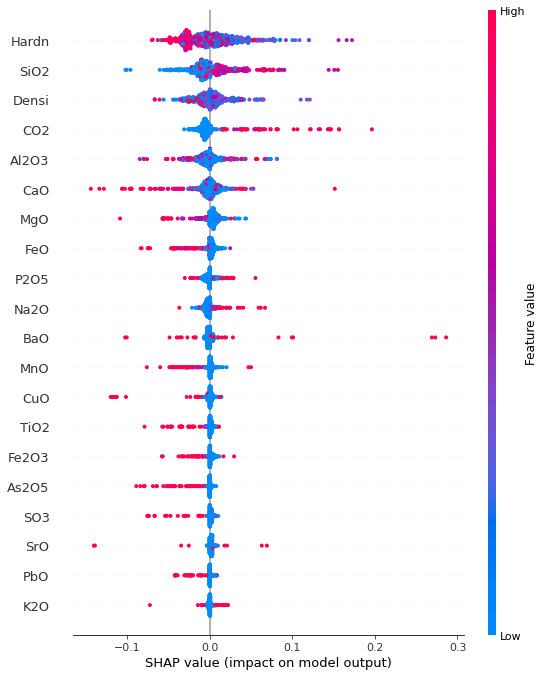

In [104]:
print(names_test[637])
shap.summary_plot(shap_values[637], x_test, feature_names=feature_names)

In [115]:
shap_vals_np.shape

(1024, 801, 22)

In [116]:
shap_values_mean = np.mean(shap_values, axis=(0, 1))

In [117]:
shap_values_mean.shape

(22,)

In [119]:
mean_shap_values = np.mean(np.abs(shap_values), axis=(0, 1)) 

feature_importance = list(zip(feature_names, mean_shap_values))
feature_importance.sort(key=lambda x: x[1], reverse=True) 

# Print feature rankings
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


Hardn: 0.016848445201758353
SiO2: 0.01580017012207785
Densi: 0.013495188575676194
Al2O3: 0.010629113102539783
CaO: 0.007836720475263898
MgO: 0.006387063610904022
P2O5: 0.005390592508541799
CO2: 0.005059602910833272
FeO: 0.0037192087969214185
Na2O: 0.003056919153920245
Fe2O3: 0.002823646974710823
MnO: 0.002726613530326974
CuO: 0.002413311958257055
TiO2: 0.0018334692402933441
BaO: 0.0018026141044321768
As2O5: 0.0017962947777325608
PbO: 0.0015894026161458344
SO3: 0.0013525068456731629
K2O: 0.0013302311971720216
ZnO: 0.0007357429399371914
SrO: 0.0006396247767766829
Cr2O3: 0.00030170238153295


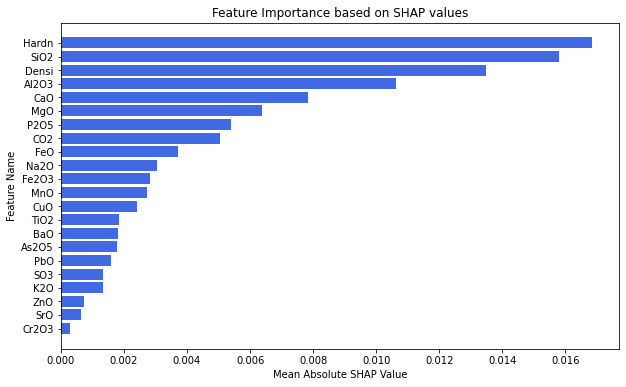

In [123]:
import matplotlib.pyplot as plt

# Unzip sorted feature names and their SHAP importance
sorted_features, sorted_importance = zip(*feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(sorted_features[::-1], sorted_importance[::-1], color='royalblue')
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature Name")
plt.title("Feature Importance based on SHAP values")
plt.show()


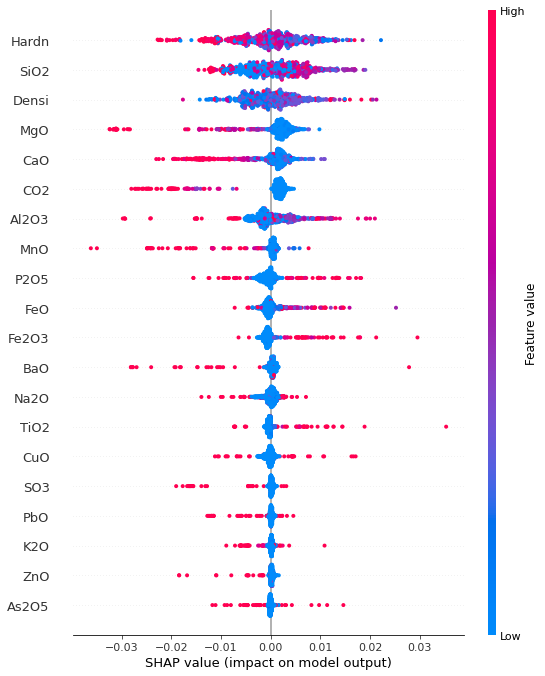

In [112]:
shap.summary_plot(shap_values_mean, x_test, feature_names=feature_names)